In [4]:
import pandas as pd
import tarfile
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

overview = 'processed_data/overviews.csv'
data = pd.read_csv(overview)
data.head()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
train_df = pd.read_csv(overview)


### Making things BERT friendly

First let's make the data compliant with BERT:
- Column 0: An ID for the row. (Required both for train and test data.)
- Column 1: The class label for the row. (Required only for train data.)
- Column 2: A column of the same letter for all rows — this is a throw-away column that we need to include because BERT expects it. (Required only for train data.)
- Column 3: The text examples we want to classify. (Required both for train and test data.)

We need to split the files into the format expected by BERT: BERT comes with data loading classes that expects two files called train and dev for training. In addition, BERT’s data loading classes can also use a test file but it expects the test file to be unlabelled.


Once the data is in the correct format, we need to save the files as .tsv (BERT doesn't take .csv as input.)

In [ ]:
# Creating training dataframe according to BERT by adding the required columns
df_bert = pd.DataFrame({
    'id':range(len(train_df)),
    'label':train_df[0],
    'alpha':['a']*train_df.shape[0],
    'text': train_df[1].replace(r'\n', ' ', regex=True)
})


# Splitting training data file into *train* and *dev*
df_bert_train, df_bert_dev = train_test_split(df_bert, test_size=0.01)

df_bert_train.head()

In [3]:
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
import pandas as pd
import numpy as np
import json
import ast
from sklearn.model_selection import train_test_split

from utils import Indexer

from tqdm import tqdm

In [4]:
links = 'data/links.csv'
metadata = 'data/movies_metadata.csv'
credit = 'data/credits.csv'
rating = 'data/ratings.csv'

train_dir = 'processed_data/rating_train.csv'
test_dir = 'processed_data/rating_test.csv'

overview = 'processed_data/overviews.csv'



In [5]:
data = pd.read_csv(overview)
data.head()

,mId,overview
0,0,"Led by Woody, Andy's toys live happily in his ..."
1,1,When siblings Judy and Peter discover an encha...
2,2,A family wedding reignites the ancient feud be...
3,3,"Cheated on, mistreated and stepped on, the wom..."
4,4,Just when George Banks has recovered from his ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mId       45463 non-null  int64 
 1   overview  44509 non-null  object
dtypes: int64(1), object(1)
memory usage: 710.5+ KB


In [13]:
mId[:2]

array([0, 1])

In [12]:
overview_sentences = np.array(data['overview'], dtype=str)
mId = np.array(data['mId'], dtype=int)
print("Number of sentence: %d"%(len(overview_sentences)) )
type(overview_sentences)
overview_sentences[:2]

Number of sentence: 45463


array(["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",
       "When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."],
      dtype='<U1000')

In [ ]:
# # Parsing the overview sentences
overview_sentences = []
for overview_sentences, mId in zip(overview_sentences, mId):
    print(overview_sentences)
    # overview_sentences.append(item)


In [ ]:
# Tokenize the sentences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000 # Size of word corpus
embedding_dim = 16 # dimension of output vector
max_length = 32 # Maximum length of token
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<ooV>'
data_size = data.shape[0] # Size of training dataset

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(overview_sentences)
word_index = tokenizer.word_index
# print(word_index)
overview_sequences = tokenizer.texts_to_sequences(overview_sentences)
overview_padded = pad_sequences(overview_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# print("\nWord Index = " , word_index)
# print(f"Sequences[:3]: {overview_sentence[:3]}")
print("Padded Sequences:")
print(overview_padded[:, :3])
print(overview_padded.shape)


In [ ]:
overview_sequences1 = tokenizer.texts_to_matrix(overview_sentences, mode='binary')

In [ ]:
print("Padded Sequences:")
print(overview_sequences1[:, :3])
print(overview_sequences1.shape)

## Some Doc2vec Inferring Testing

In [ ]:
# Infer a vector for a new doc
test = ["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences"]
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in test]
print(f"test sample: {texts}")
vector = model.infer_vector(texts[0])
print(f"vector: {vector}")

In [14]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

file_name = 'Doc2vec_overview.model'
model = Doc2Vec.load(file_name)
# Infer a vector for a new doc
stoplist = set('for a of the and to in'.split(' '))
test = ["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences"]
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in test]
print(f"test sample: {texts}")
vector = model.infer_vector(texts[0])
print(f"vector: {vector}")
print(f"Size of corpus: {len(model.wv.vocab)}")   # Now the vocab contains 28322 uinque words
print(f"Dimension of the the entire corpus: {model.wv.vectors.shape}")
print(f"Similarity word for 'beautiful': {model.wv.most_similar('beautiful')}")
print(f"Check the dim of single word: {model.wv['right']}")

# Save the model as textfile
import numpy as np
import pandas as pd
result = np.array([model.docvecs[i] for i in range(len(model.wv.vocab))])
overview = 'processed_data/overviews.csv'
data = pd.read_csv(overview) 
mId = data['mId'].astype(int)


test sample: [['led', 'by', 'woody,', "andy's", 'toys', 'live', 'happily', 'his', 'room', 'until', "andy's", 'birthday', 'brings', 'buzz', 'lightyear', 'onto', 'scene.', 'afraid', 'losing', 'his', 'place', "andy's", 'heart,', 'woody', 'plots', 'against', 'buzz.', 'but', 'when', 'circumstances', 'separate', 'buzz', 'woody', 'from', 'their', 'owner,', 'duo', 'eventually', 'learns', 'put', 'aside', 'their', 'differences']]
vector: [ 2.53427565e-01 -1.91519991e-01 -3.27205777e-01  4.09432054e-01
  8.12309794e-03  6.51520640e-02  7.41483644e-02 -2.02886283e-01
  2.06517339e-01 -1.08608149e-01 -1.03892714e-01  4.57970053e-01
 -3.84300423e-04 -1.90323099e-01 -1.19535565e-01 -7.74848610e-02
 -3.42422754e-01  4.66018587e-01  3.69809642e-02  6.07786467e-03
  9.69075188e-02  2.02299431e-01 -2.24648967e-01 -3.52690667e-02
  3.11791360e-01 -2.45541766e-01 -1.89744979e-01 -6.32600784e-02
 -1.01773053e-01 -3.11593026e-01 -6.05396852e-02  2.10087858e-02
  8.97791237e-02  3.94242883e-01 -2.17385292e-01

In [15]:
print(f"Expected total line: {len(model.wv.vocab)}")

Expected total line: 29366


# Testing the matplotlib for cse5194 Presentation

In [3]:
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
import pandas as pd
import numpy as np
import json
import ast
from sklearn.model_selection import train_test_split

from utils import Indexer

from tqdm import tqdm
x1 = np.arange(10)
x2 = x1*2
y = x1*2
y

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

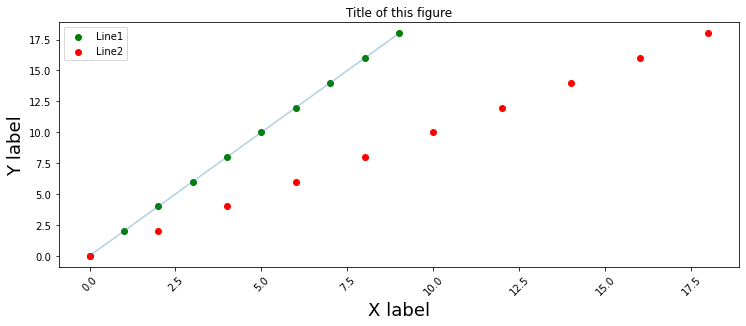

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.arange(10)
x2 = x1*2
y = x1*2

plt.figure(figsize=(12.2, 4.5)) # width=12.2in, height=4.5in
plt.scatter(x1, y, color='green', label='Line1')
plt.scatter(x2, y, color='red', label='Line2')
plt.plot(x1, y, alpha=0.35) #	Plot y versus x as lines and/or markers.
plt.xticks(rotation=45)
plt.title(label='Title of this figure')
plt.xlabel('X label', fontsize=18)
plt.ylabel('Y label', fontsize=18)
plt.legend(loc='best')
plt.show()


<BarContainer object of 4 artists>

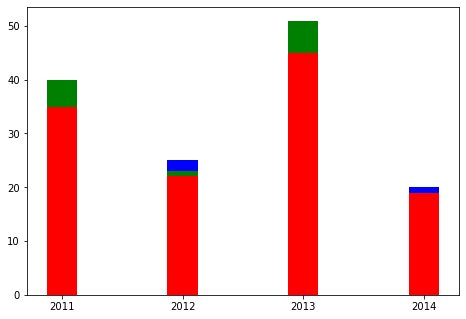

In [9]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = ['2011', '2012', '2013', '2014']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X, data[0], color = 'b', width = 0.25)
ax.bar(X, data[1], color = 'g', width = 0.25)
ax.bar(X, data[2], color = 'r', width = 0.25)

In [34]:
x = np.array([[[0.0862, 0.0971, 0.1114, 0.1269, 0.0992], [0.7380, 0.8205, 0.8429, 0.8533, 0.8766], [0.0899, 0.1048, 0.1105, 0.0967, 0.150]]]).reshape(5,3)
x

array([[0.0862, 0.0971, 0.1114],
       [0.1269, 0.0992, 0.738 ],
       [0.8205, 0.8429, 0.8533],
       [0.8766, 0.0899, 0.1048],
       [0.1105, 0.0967, 0.15  ]])

'1.0.3'

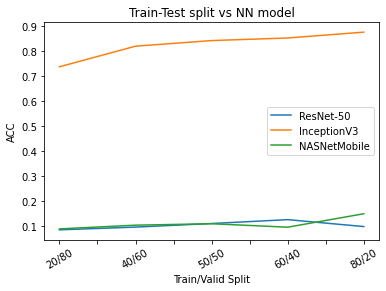

In [11]:
df = pd.DataFrame([[0.0862, 0.7380, 0.0899],
       [0.0971, 0.8205, 0.1048 ],
       [0.1114, 0.8429, 0.1105],
       [0.1269, 0.8533, 0.0967],
       [0.0992, 0.8766, 0.1505]], columns=['ResNet-50', 'InceptionV3', 'NASNetMobile'], index=['20/80', '40/60', '50/50', '60/40', '80/20'])
ax = df.plot(title='Train-Test split vs NN model', rot=30, xlabel='Train/Valid Split', ylabel='ACC')
# ax.set()
# loc='upper center', 


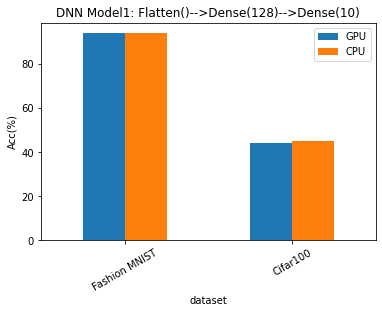

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# df = pd.DataFrame(np.array([[94.13, 94.01], [44.91, 43.97]]),
#     index = ["Fashion MNIST", "Cifar100"],
#     columns=pd.Index(['GPU',' CPU'], name='Device')
# )
df = pd.DataFrame({'GPU': [94.01, 43.97],
        'CPU': [94.01, 44.91]},
        index=["Fashion MNIST", "Cifar100"]
)

df.plot.bar(xlabel='dataset', ylabel='Acc(%)', title='DNN Model1: Flatten()-->Dense(128)-->Dense(10)', rot=30)

# acc = [[94.13, 94.01], [44.91, 43.97]] # CPU acc and GPU acc for Fashion MNIST and Cifar100
# time = [[2.812, 2.871], [1.1, 2.2]]
# X = np.arange(4)
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
# ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)

[Text(0, 0.5, 'Acc(%)'), Text(0.5, 0, 'dataset')]

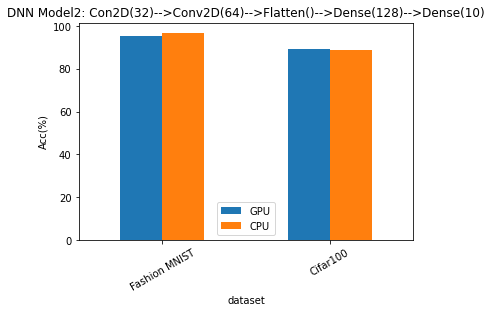

In [3]:
df = pd.DataFrame({'GPU': [95.5, 89.06],
        'CPU': [96.77, 88.61]},
        index=["Fashion MNIST", "Cifar100"]
)
ax = df.plot.bar( title='DNN Model2: Con2D(32)-->Conv2D(64)-->Flatten()-->Dense(128)-->Dense(10)', rot=30)
ax.set(xlabel='dataset', ylabel='Acc(%)')


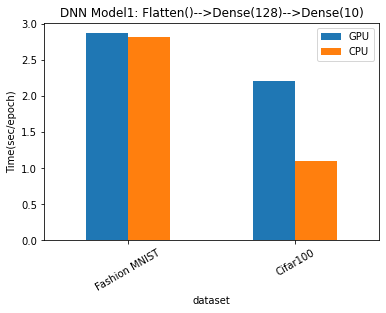

In [4]:
df = pd.DataFrame({'GPU': [2.871, 2.2],
        'CPU': [2.812, 1.1]},
        index=["Fashion MNIST", "Cifar100"]
)

df.plot.bar(xlabel='dataset', ylabel='Time(sec/epoch)', title='DNN Model1: Flatten()-->Dense(128)-->Dense(10)', rot=30)

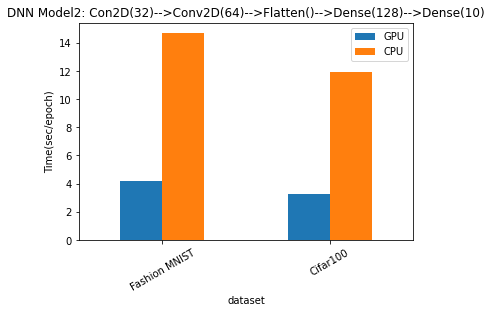

In [5]:
df = pd.DataFrame({'GPU': [4.2, 3.3],
        'CPU': [14.7, 11.9]},
        index=["Fashion MNIST", "Cifar100"]
)

df.plot.bar(xlabel='dataset', ylabel='Time(sec/epoch)', title='DNN Model2: Con2D(32)-->Conv2D(64)-->Flatten()-->Dense(128)-->Dense(10)', rot=30)


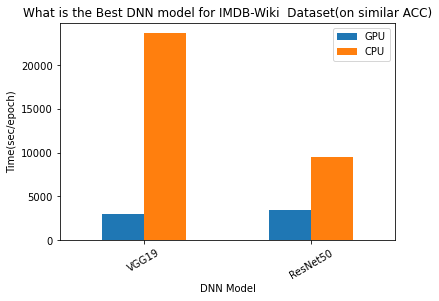

In [6]:
df = pd.DataFrame({'GPU': [3022, 3429],
        'CPU': [23679, 9526]},
        index=["VGG19", "ResNet50"]
)

df.plot.bar(xlabel='DNN Model', ylabel='Time(sec/epoch)', title='What is the Best DNN model for IMDB-Wiki  Dataset(on similar ACC)', rot=30)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A7EEDA580>,
      dtype=object)

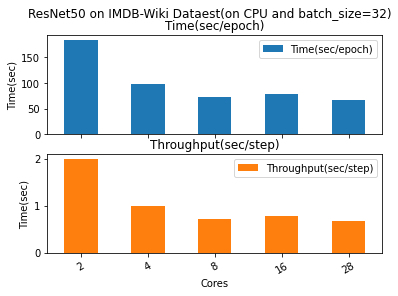

In [7]:
df = pd.DataFrame({'Time(sec/epoch)': [184, 99, 72, 78, 67],
        'Throughput(sec/step)': [2, 0.988, 0.719, 0.779, 0.668]},
        index=[2, 4, 8, 16, 28]
)

df.plot.bar(xlabel='Cores', ylabel='Time(sec)', title='ResNet50 on IMDB-Wiki Dataest(on CPU and batch_size=32)', rot=30, subplots=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A7EFA72E0>,
      dtype=object)

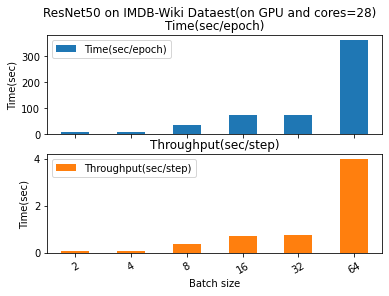

In [8]:
df = pd.DataFrame({'Time(sec/epoch)': [8, 10, 37, 72, 74, 361],
        # 'Throughput(step/ms)': [84, 95, 374, 715, 737, 4000]},
        'Throughput(sec/step)': [0.084, 0.095, 0.374, 0.715, 0.737, 4]},
        index=[2, 4, 8, 16, 32, 64]
)

df.plot.bar(xlabel='Batch size', ylabel='Time(sec)', title='ResNet50 on IMDB-Wiki Dataest(on GPU and cores=28)', rot=30, subplots=True)


In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(model):
  plt.plot(model['loss'], 'loss')
  plt.plot(model['accuracy'], 'accuracy')
  plt.plot(model['precision'])
  plt.xlabel("Epochs")
  plt.ylabel("ACC")
  plt.show()

plot_graphs(ResNet_stat)
# plot_graphs(NASNet_stat)
# plot_graphs(InceptionV3_stat)

In [ ]:
print("hello world")